## 1. Google Play Store apps and reviews

Mobile apps are everywhere. They are easy to create and can be lucrative(yields more profit). Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Google Play logo

Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv("apps.csv")
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
0         4.1      159                 19M      10,000+  Free     0   
1         3.9      967                 14M     500,000+  Free     0   
2         4.7    87510                8.7M   5,000,000+  Free     0   
3         4.5   215644                 25M  50,000,000+  Free     0   
4         4.3      967                2.8M     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [3]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
df1[df1.Reviews>215644].head(20)

App             Category  \
19                                    ibis Paint X       ART_AND_DESIGN   
42                      Textgram - write on photos       ART_AND_DESIGN   
72   Android Auto - Maps, Media, Messaging & Voice    AUTO_AND_VEHICLES   
139                           Wattpad 📖 Free Books  BOOKS_AND_REFERENCE   
142                                      Wikipedia  BOOKS_AND_REFERENCE   
143                                  Amazon Kindle  BOOKS_AND_REFERENCE   
144                                    Cool Reader  BOOKS_AND_REFERENCE   
145                   Dictionary - Merriam-Webster  BOOKS_AND_REFERENCE   
152                              Google Play Books  BOOKS_AND_REFERENCE   
155            Oxford Dictionary of English : Free  BOOKS_AND_REFERENCE   
179                                   Moon+ Reader  BOOKS_AND_REFERENCE   
186                   English Dictionary - Offline  BOOKS_AND_REFERENCE   
188                              Indeed Job Search             BUSINESS   
189                                    Uber Driver             BUSINESS   
192                  Docs To Go™ Free Office Suite             BUSINESS   
194         OfficeSuite : Free Office + PDF Editor             BUSINESS   
201                         Facebook Pages Manager             BUSINESS   
218                        MyASUS - Service Center             BUSINESS   
231                 Tiny Scanner - PDF Scanner App             BUSINESS   
297                     LINE WEBTOON - Free Comics               COMICS   

     Rating  Reviews                Size        Installs  Type Price  \
19      4.6   224399                 31M     10,000,000+  Free     0   
42      4.4   295221  Varies with device     10,000,000+  Free     0   
72      4.2   271920                 16M     10,000,000+  Free     0   
139     4.6  2914724  Varies with device    100,000,000+  Free     0   
142     4.4   577550  Varies with device     10,000,000+  Free     0   
143     4.2   814080  Varies with device    100,000,000+  Free     0   
144     4.5   246315  Varies with device     10,000,000+  Free     0   
145     4.5   454060  Varies with device     10,000,000+  Free     0   
152     3.9  1433233  Varies with device  1,000,000,000+  Free     0   
155     4.1   363934                7.1M     10,000,000+  Free     0   
179     4.4   233757  Varies with device     10,000,000+  Free     0   
186     4.4   341157                 30M     10,000,000+  Free     0   
188     4.3   674730  Varies with device     50,000,000+  Free     0   
189     4.4  1254730  Varies with device     10,000,000+  Free     0   
192     4.1   217730  Varies with device     50,000,000+  Free     0   
194     4.3  1002861                 35M    100,000,000+  Free     0   
201     4.0  1279184  Varies with device     50,000,000+  Free     0   
218     4.4   380837                7.3M     10,000,000+  Free     0   
231     4.7   286897                 39M     10,000,000+  Free     0   
297     4.5  1013635  Varies with device     10,000,000+  Free     0   

    Content Rating             Genres    Last Updated         Current Ver  \
19        Everyone       Art & Design   July 30, 2018               5.5.4   
42        Everyone       Art & Design   July 30, 2018  Varies with device   
72            Teen    Auto & Vehicles   July 11, 2018  Varies with device   
139           Teen  Books & Reference  August 1, 2018  Varies with device   
142       Everyone  Books & Reference  August 2, 2018  Varies with device   
143           Teen  Books & Reference   July 27, 2018  Varies with device   
144       Everyone  Books & Reference   July 17, 2015  Varies with device   
145       Everyone  Books & Reference    May 18, 2018  Varies with device   
152           Teen  Books & Reference  August 3, 2018  Varies with device   
155       Everyone  Books & Reference   July 11, 2018             9.1.363   
179       Everyone  Books & Reference     May 1, 2018  Varies with device   
186   Everyone 10+  Books & Refere

In [5]:
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [6]:
df1[(df1.Reviews>2772226) & (df1.Category=="GAME")]

App Category  Rating  \
1653                                             ROBLOX     GAME     4.5   
1654                                     Subway Surfers     GAME     4.5   
1655                                   Candy Crush Saga     GAME     4.4   
1659                                         slither.io     GAME     4.4   
1660                                       Clash Royale     GAME     4.6   
1661                                       Temple Run 2     GAME     4.3   
1662                                                Pou     GAME     4.3   
1666                            Plants vs. Zombies FREE     GAME     4.4   
1667                                         Sonic Dash     GAME     4.5   
1668                              Candy Crush Soda Saga     GAME     4.4   
1670                                     Clash of Clans     GAME     4.6   
1675                                        8 Ball Pool     GAME     4.5   
1680                                Angry Birds Classic     GAME     4.4   
1685                                     Zombie Tsunami     GAME     4.4   
1689                                  Hill Climb Racing     GAME     4.4   
1690                                       Gardenscapes     GAME     4.6   
1694           Minion Rush: Despicable Me Official Game     GAME     4.5   
1695                                   Farm Heroes Saga     GAME     4.4   
1697                                  My Talking Angela     GAME     4.5   
1699   Sniper 3D Gun Shooter: Free Shooting Games - FPS     GAME     4.6   
1707                                      Cooking Fever     GAME     4.5   
1709                                        Score! Hero     GAME     4.6   
1718                                   Garena Free Fire     GAME     4.5   
1722                                     My Talking Tom     GAME     4.5   
1739                           Dream League Soccer 2018     GAME     4.6   
1742                                      Traffic Racer     GAME     4.5   
1758                             Hungry Shark Evolution     GAME     4.5   
1763                                     Piano Tiles 2™     GAME     4.7   
1764                                         Pokémon GO     GAME     4.1   
1781                                       Trivia Crack     GAME     4.5   
1785                                        PUBG MOBILE     GAME     4.4   
1790              Castle Clash: Heroes of the Empire US     GAME     4.6   
1808                                         Homescapes     GAME     4.6   
1843                                      Angry Birds 2     GAME     4.6   
1866  Lords Mobile: Battle of the Empires - Strategy...     GAME     4.4   
1893                                            Yes day     GAME     4.5   
1919                                        Crossy Road     GAME     4.5   
1932                                     Shadow Fight 2     GAME     4.6   
1947                                            Agar.io     GAME     4.2   
1962                                         War Robots     GAME     4.6   
2007                                    Jetpack Joyride     GAME     4.4   
3912                                Asphalt 8: Airborne     GAME     4.5   
3958                                    MORTAL KOMBAT X     GAME     4.4   
3967     Pixel Gun 3D: Survival shooter & Battle Royale     GAME     4.5   
4037                                       Fruit Ninja®     GAME     4.3   
4043                                             Vector     GAME     4.4   
4044                                        Dr. Driving     GAME     4.5   
4059                                          Smash Hit     GAME     4.5   
4061                                         Temple Run     GAME     4.3   
4146                        Gangstar Vegas - mafia game     GAME     4.5   
4188                                 Geometry Dash Lite     GAME     4.5   
4886                                    Angry Birds Go!     GAME     4.2   
5417                    

In [7]:
df1[(df1.Reviews>277222) & (df1.Category=="SPORTS")]

App Category  Rating  \
2959                                             ESPN   SPORTS     4.2   
2961                    LiveScore: Live Sport Updates   SPORTS     4.4   
2963                                              NFL   SPORTS     4.1   
2965                      Onefootball - Soccer Scores   SPORTS     4.7   
2967    FIFA - Tournaments, Soccer News & Live Scores   SPORTS     4.2   
2974                      FotMob - Live Soccer Scores   SPORTS     4.7   
2975      Yahoo Fantasy Sports - #1 Rated Fantasy App   SPORTS     4.2   
3016                                        WatchESPN   SPORTS     4.1   
3083                          365Scores - Live Scores   SPORTS     4.6   
3084            Cricbuzz - Live Cricket Scores & News   SPORTS     4.5   
3101                                  Real Basketball   SPORTS     4.5   
3914                                 Basketball Stars   SPORTS     4.4   
4054                                       3D Bowling   SPORTS     4.1   
4159                          Wrestling Revolution 3D   SPORTS     4.3   
5416                    PES 2018 PRO EVOLUTION SOCCER   SPORTS     4.4   
5429  Soccer Star 2018 Top Leagues · MLS Soccer Games   SPORTS     4.6   
5438                                        3D Tennis   SPORTS     4.2   
6067            Top Eleven 2018 - Be a Soccer Manager   SPORTS     4.4   
8445                                      FIFA Soccer   SPORTS     4.2   
8864                      Online Soccer Manager (OSM)   SPORTS     4.5   
8878                                 PES CLUB MANAGER   SPORTS     4.4   
9140                                   EA SPORTS UFC®   SPORTS     4.5   
9141                       NBA LIVE Mobile Basketball   SPORTS     4.4   
9145                     EA SPORTS™ FIFA 18 Companion   SPORTS     3.9   
9164                                   FIFA 16 Soccer   SPORTS     4.1   
9174                                    Real Football   SPORTS     4.1   

      Reviews                Size      Installs  Type Price Content Rating  \
2959   521138  Varies with device   10,000,000+  Free     0   Everyone 10+   
2961   283662  Varies with device   10,000,000+  Free     0       Everyone   
2963   459795  Varies with device   50,000,000+  Free     0       Everyone   
2965   911995                 20M   10,000,000+  Free     0       Everyone   
2967   342909                6.0M   10,000,000+  Free     0       Everyone   
2974   410384  Varies with device   10,000,000+  Free     0       Everyone   
2975   277902  Varies with device    5,000,000+  Free     0     Mature 17+   
3016   288809                6.6M   10,000,000+  Free     0       Everyone   
3083   666521                 25M   10,000,000+  Free     0       Everyone   
3084   838765  Varies with device   50,000,000+  Free     0       Everyone   
3101  1605267  Varies with device   10,000,000+  Free     0       Everyone   
3914   867920                 45M   10,000,000+  Free     0       Everyone   
4054  1076243                 13M  100,000,000+  Free     0       Everyone   
4159   989344                 51M   50,000,000+  Free     0           Teen   
5416  1721943                 26M   10,000,000+  Free     0       Everyone   
5429   652940                 90M   10,000,000+  Free     0           Teen   
5438  1008012                 13M   50,000,000+  Free     0       Everyone   
6067  3451011  Varies with device   50,000,000+  Free     0       Everyone   
8445  3909032                 51M  100,000,000+  Free     0       Everyone   
8864  1312936                 21M   10,000,000+  Free     0       Everyone   
8878   783025  Varies with device   10,000,000+  Free     0       Everyone   
9140  2371338                 37M   50,000,000+  Free     0           Teen   
9141  1690802                 58M   50,000,000+  Free     0       Everyone   
9145   282727                 63M   10,000,000+  Free     0       Everyone   
9164   820577                 30M   10,000,000+  Free     0       Everyone   
9174   585564          

In [8]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
pd.to_datetime(df1["Last Updated"]).dt.year.unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010], dtype=int64)

In [10]:
df1=df1.drop_duplicates()

In [11]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
0         4.1      159                 19M      10,000+  Free     0   
1         3.9      967                 14M     500,000+  Free     0   
2         4.7    87510                8.7M   5,000,000+  Free     0   
3         4.5   215644                 25M  50,000,000+  Free     0   
4         4.3      967                2.8M     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [12]:
len(df1)

9659

In [13]:
df1.size

125567

In [14]:
df1.sample(5)

App        Category  \
6334                            뽕티비 - 개인방송, 인터넷방송, BJ방송   VIDEO_PLAYERS   
1198                            Easy and quick desserts  FOOD_AND_DRINK   
7954                    Resume Builder and CV maker app    PRODUCTIVITY   
449   Truecaller: Caller ID, SMS spam blocking & Dialer   COMMUNICATION   
2457                                      PrimeDelivery         MEDICAL   

      Rating  Reviews                Size      Installs  Type Price  \
6334     NaN      414                 59M      100,000+  Free     0   
1198     4.6     1398                 10M      100,000+  Free     0   
7954     4.3     2303                 15M      100,000+  Free     0   
449      4.5  7820209  Varies with device  100,000,000+  Free     0   
2457     5.0        3                 53M           10+  Free     0   

     Content Rating                   Genres    Last Updated  \
6334     Mature 17+  Video Players & Editors   July 18, 2018   
1198   Everyone 10+             Food & Drink   June 14, 2018   
7954       Everyone             Productivity  August 2, 2018   
449        Everyone            Communication  August 1, 2018   
2457       Everyone                  Medical   July 13, 2018   

             Current Ver         Android Ver  
6334               4.0.7        4.0.3 and up  
1198                 1.0        4.0.3 and up  
7954           8.9.2.pro        4.0.3 and up  
449   Varies with device  Varies with device  
2457                 0.1          4.1 and up

## 2. Data cleaning

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [15]:
df1.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
df1["Price"].sample(30)

8997        0
3347        0
8922        0
7239        0
4873        0
3402        0
5133        0
5233        0
6711        0
2129        0
150         0
1936        0
7048        0
6179    $1.49
9326        0
6973        0
6753    $1.49
1039        0
3383        0
8301        0
7429        0
6687    $1.49
7268        0
1492        0
6701        0
6328        0
3196        0
906         0
8857        0
8562        0
Name: Price, dtype: object

In [17]:
df1["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
df1["Price"]=df1["Price"].apply(lambda x: float(x) if x=="0" else float(x[1:]))
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type  Price  \
0         4.1      159                 19M      10,000+  Free    0.0   
1         3.9      967                 14M     500,000+  Free    0.0   
2         4.7    87510                8.7M   5,000,000+  Free    0.0   
3         4.5   215644                 25M  50,000,000+  Free    0.0   
4         4.3      967                2.8M     100,000+  Free    0.0   
...       ...      ...                 ...          ...   ...    ...   
10836     4.5       38                 53M       5,000+  Free    0.0   
10837     5.0        4                3.6M         100+  Free    0.0   
10838     NaN        3                9.5M       1,000+  Free    0.0   
10839     4.5      114  Varies with device       1,000+  Free    0.0   
10840     4.5   398307                 19M  10,000,000+  Free    0.0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [19]:
df1["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [20]:
df1["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
x=""
for i in ['10', '000', '000']:
    x=x+i
print(x)

10000000


In [22]:
"10000000+"[:-1].split(",")

['10000000']

In [23]:
def func(x):
    if x=='0':
        return float(x)
    else:
        a=""
        for i in x[:-1].split(","):
            a=a+i
        return float(a)

        

In [24]:
df1["Installs"]=df1["Installs"].apply(func)

In [25]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size    Installs  Type  Price  \
0         4.1      159                 19M     10000.0  Free    0.0   
1         3.9      967                 14M    500000.0  Free    0.0   
2         4.7    87510                8.7M   5000000.0  Free    0.0   
3         4.5   215644                 25M  50000000.0  Free    0.0   
4         4.3      967                2.8M    100000.0  Free    0.0   
...       ...      ...                 ...         ...   ...    ...   
10836     4.5       38                 53M      5000.0  Free    0.0   
10837     5.0        4                3.6M       100.0  Free    0.0   
10838     NaN        3                9.5M      1000.0  Free    0.0   
10839     4.5      114  Varies with device      1000.0  Free    0.0   
10840     4.5   398307                 19M  10000000.0  Free    0.0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9659 rows x 13 columns]

In [26]:
df1["Size"].isnull().sum()

0

In [27]:
df1[df1["Size"]=='Varies with device']

App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10713  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10725                                          Posta App  MAPS_AND_NAVIGATION   
10765                    Chat For Strangers - Video Chat               SOCIAL   
10826          Frim: get new friends on local chat rooms               SOCIAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating  Reviews                Size    Installs  Type  Price  \
37        4.1    36639  Varies with device   5000000.0  Free    0.0   
42        4.4   295221  Varies with device  10000000.0  Free    0.0   
52        4.6    17057  Varies with device   1000000.0  Free    0.0   
67        4.3    40211  Varies with device   5000000.0  Free    0.0   
68        3.9      356  Varies with device    100000.0  Free    0.0   
...       ...      ...                 ...         ...   ...    ...   
10713     4.4     3471  Varies with device    100000.0  Free    0.0   
10725     3.6        8  Varies with device      1000.0  Free    0.0   
10765     3.4      622  Varies with device    100000.0  Free    0.0   
10826     4.0    88486  Varies with device   5000000.0  Free    0.0   
10839     4.5      114  Varies with device      1000.0  Free    0.0   

      Content Rating             Genres        Last Updated  \
37          Everyone       Art & Design       July 14, 2018   
42          Everyone       Art & Design       July 30, 2018   
52          Everyone    Auto & Vehicles       July 30, 2018   
67          Everyone    Auto & Vehicles       July 30, 2018   
68          Everyone    Auto & Vehicles        May 25, 2018   
...              ...                ...                 ...   
10713       Everyone            Weather       July 24, 2018   
10725       Everyone  Maps & Navigation  September 27, 2017   
10765     Mature 17+             Social        May 23, 2018   
10826     Mature 17+             Social      March 23, 2018   
10839     Mature 17+  Books & Reference    January 19, 2015   

              Current Ver         Android Ver  
37     Varies with device        2.3.3 and up  
42     Varies with device  Varies with device  
52     Varies with device  Varies with device  
67     Varies with device  Varies with device  
68     Varies with device  Varies with device  
...                   ...                 ...  
10713  Varies with device  Varies with device  
10725  Varies with device          4.4 and up  
10765  Varies with device  Varies with device  
10826  Varies with device  Varies with device  
10839  Varies with device  Varies with device  

[1227 rows x 13 columns]

In [28]:
df1["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [29]:
# df1.replace({"Size":{"Varies with device":np.nan}},inplace=True)

In [30]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [31]:
df1[df1["Size"].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [32]:
df1["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [33]:
type("200l")

str

In [34]:
def func(x):
    if x=="Varies with device":
        return np.nan
    elif x[-1]=="k":
        return float(x[:-1])/1024
    else:
        return float(x[:-1])


In [35]:
df1["Size"]=df1["Size"].apply(func)

In [36]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews  Size    Installs  Type  Price Content Rating  \
0         4.1      159  19.0     10000.0  Free    0.0       Everyone   
1         3.9      967  14.0    500000.0  Free    0.0       Everyone   
2         4.7    87510   8.7   5000000.0  Free    0.0       Everyone   
3         4.5   215644  25.0  50000000.0  Free    0.0           Teen   
4         4.3      967   2.8    100000.0  Free    0.0       Everyone   
...       ...      ...   ...         ...   ...    ...            ...   
10836     4.5       38  53.0      5000.0  Free    0.0       Everyone   
10837     5.0        4   3.6       100.0  Free    0.0       Everyone   
10838     NaN        3   9.5      1000.0  Free    0.0       Everyone   
10839     4.5      114   NaN      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307  19.0  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[9659 rows x 13 columns]

In [37]:
df1["Size"].isna().sum()

1227

In [38]:
df1["Size"].mean()
round(20395289.31451613,2)

20395289.31

In [39]:
df1["Size"].fillna(20395289.31,inplace=True)

In [40]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[9659 rows x 13 columns]

## 3. Android market breakdown

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

* Which category has the highest share of (active) apps in the market?

* Is any specific category dominating the market?

* Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [41]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device  

[9659 rows x 13 columns]

Which category has the highest share of (active) apps in the market?

In [42]:
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [43]:
df1.groupby(["Category"])["App"].count()

Category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1832
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
Name: App, dtype: int64

In [44]:
a=pd.DataFrame(df1.groupby(["Category"])["App"].count()).sort_values(by="App")
a

App
Category                 
BEAUTY                 53
COMICS                 56
PARENTING              60
ART_AND_DESIGN         64
EVENTS                 64
HOUSE_AND_HOME         74
WEATHER                79
LIBRARIES_AND_DEMO     84
AUTO_AND_VEHICLES      85
ENTERTAINMENT         102
FOOD_AND_DRINK        112
EDUCATION             119
MAPS_AND_NAVIGATION   131
VIDEO_PLAYERS         163
DATING                171
SHOPPING              202
TRAVEL_AND_LOCAL      219
BOOKS_AND_REFERENCE   222
SOCIAL                239
NEWS_AND_MAGAZINES    254
PHOTOGRAPHY           281
HEALTH_AND_FITNESS    288
COMMUNICATION         315
SPORTS                325
FINANCE               345
LIFESTYLE             369
PRODUCTIVITY          374
PERSONALIZATION       376
MEDICAL               395
BUSINESS              420
TOOLS                 827
GAME                  959
FAMILY               1832

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'BEAUTY'),
  Text(1, 0, 'COMICS'),
  Text(2, 0, 'PARENTING'),
  Text(3, 0, 'ART_AND_DESIGN'),
  Text(4, 0, 'EVENTS'),
  Text(5, 0, 'HOUSE_AND_HOME'),
  Text(6, 0, 'WEATHER'),
  Text(7, 0, 'LIBRARIES_AND_DEMO'),
  Text(8, 0, 'AUTO_AND_VEHICLES'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'FOOD_AND_DRINK'),
  Text(11, 0, 'EDUCATION'),
  Text(12, 0, 'MAPS_AND_NAVIGATION'),
  Text(13, 0, 'VIDEO_PLAYERS'),
  Text(14, 0, 'DATING'),
  Text(15, 0, 'SHOPPING'),
  Text(16, 0, 'TRAVEL_AND_LOCAL'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'SOCIAL'),
  Text(19, 0, 'NEWS_AND_MAGAZINES'),
  Text(20, 0, 'PHOTOGRAPHY'),
  Text(21, 0, 'HEALTH_AND_FITNESS'),
  Text(22, 0, 'COMMUNICATION'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'FINANCE'),
  Text(25, 0, 'LIFESTYLE'),
  Text(26, 0, 'PRODUCTIVITY'),
  Text(27, 0, 'PERSONALIZATION'),

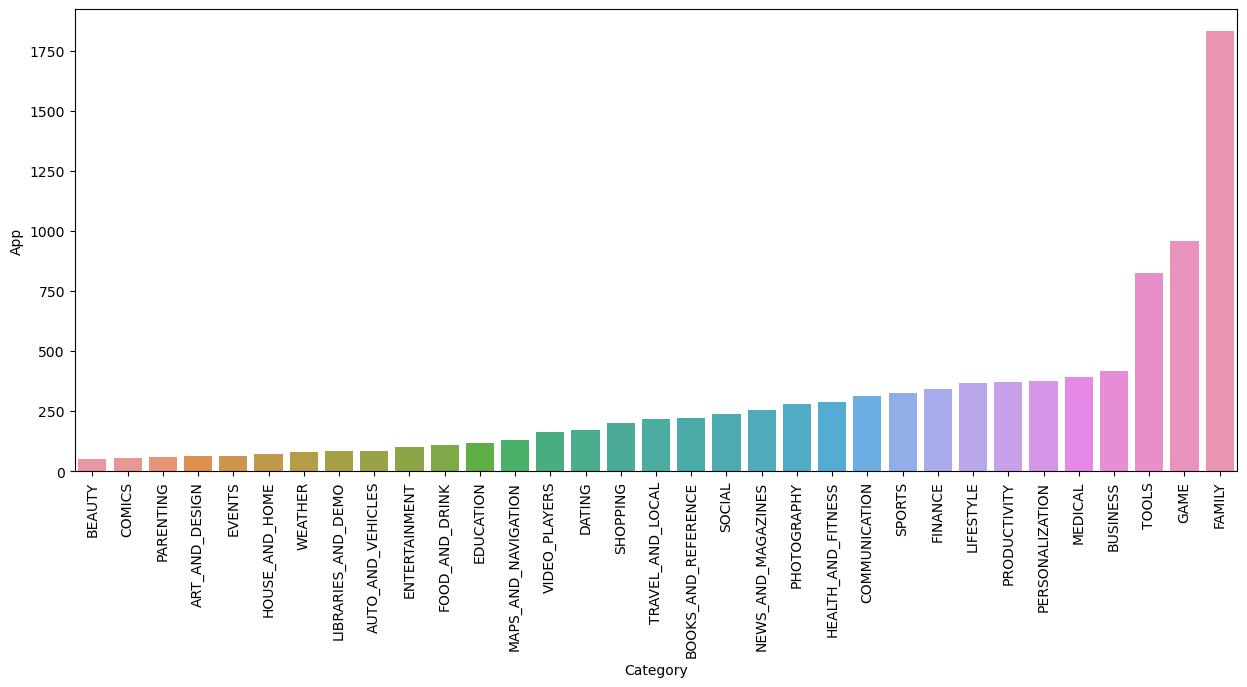

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(data=a,x=a.index,y=a["App"])
plt.xticks(rotation=90)

In [46]:
df1[df1["Category"]=="FAMILY"].sample(30)

App Category  Rating  \
8098                                Igitabo cy'Indirimbo   FAMILY     4.5   
7019                      3D Color by Number with Voxels   FAMILY     4.5   
9274                           EF English Live for phone   FAMILY     3.6   
2058        Baby Tiger Care - My Cute Virtual Pet Friend   FAMILY     4.5   
10504                         Motocross Beach Jumping 3D   FAMILY     4.0   
8451                              Cooking in the Kitchen   FAMILY     4.1   
8674                                         All Type DP   FAMILY     4.3   
5333                       Quran Juz-30 - Mahad al Zahra   FAMILY     4.6   
9673                        Masha and Bear: Cooking Dash   FAMILY     4.3   
4065   Car Parking Game 3D - Real City Driving Challenge   FAMILY     4.4   
7086                             CA Lottery Official App   FAMILY     4.2   
9767   Blood Injection : ER Emergency Doctor ER injec...   FAMILY     3.5   
6346                                     Phonics Puzzles   FAMILY     3.8   
8415                                        Tiny Defense   FAMILY     4.1   
9705                                            EP Radio   FAMILY     5.0   
7448                                       CJ Auto école   FAMILY     NaN   
2137                                    Cute Pet Puppies   FAMILY     4.0   
9496                                          Master E.K   FAMILY     5.0   
5865                        Gangster Town: Vice District   FAMILY     4.3   
4109                              Offroad Pickup Truck F   FAMILY     4.3   
6609                                Blood Pressure Diary   FAMILY     4.6   
9629                                 Learn English Daily   FAMILY     4.5   
5663   Learners Test Free: AU Driver Knowledge Test (...   FAMILY     3.9   
9430                                         Egg for Pou   FAMILY     3.0   
8935                                     DV-2019 Results   FAMILY     4.3   
6926                                     SAP BW Tutorial   FAMILY     4.0   
8317                                  Myth Defense 2: DF   FAMILY     4.2   
9735              Eye Transplant : ER Emergency Hospital   FAMILY     3.9   
8937                        DV-LOTTERY 2019 REGISTRATION   FAMILY     4.5   
9757       ER Neck Surgery: Hospital Christmas Emergency   FAMILY     NaN   

       Reviews          Size    Installs  Type  Price Content Rating  \
8098        93  1.600000e+00     50000.0  Free   0.00       Everyone   
7019      5481  6.900000e+01    500000.0  Free   0.00       Everyone   
9274      2210  1.500000e+01    100000.0  Free   0.00       Everyone   
2058       432  6.300000e+01    100000.0  Free   0.00   Everyone 10+   
10504   105954  4.300000e+01  10000000.0  Free   0.00           Teen   
8451    217736  8.700000e+01  10000000.0  Free   0.00       Everyone   
8674      1853  5.800000e+00    500000.0  Free   0.00       Everyone   
5333      2654  6.700000e+00    100000.0  Free   0.00       Everyone   
9673    151374  5.400000e+01  10000000.0  Free   0.00       Everyone   
4065    187892  4.000000e+01   5000000.0  Free   0.00       Everyone   
7086      7000  2.600000e+01   1000000.0  Free   0.00           Teen   
9767       246  3.500000e+01     50000.0  Free   0.00           Teen   
6346         4  5.400000e+01       100.0  Paid   2.99       Everyone   
8415     29387  1.600000e+01   1000000.0  Free   0.00       Everyone   
9705         3  1.503906e-01        50.0  Free   0.00       Everyone   
7448         0  1.200000e+01        50.0  Free   0.00       Everyone   
2137     10447  3.600000e+01   1000000.0  Free   0.00       Everyone   
9496        90  2.039529e+07      1000.0  Free   0.00       Everyone   
5865     65146  1.000000e+02  10000000.0  Free   0.00     Mature 17+   
4109      4551  7.900000e+01    500000.0  Free   0.00       Everyone   
6609        47  3.300000e+00      5000.0  Free   0.00       Everyone   
9629      7881  5.300000e+01    500000.0  Free   0.00       Everyone   
5663     

In [47]:
a=pd.DataFrame(df1.groupby(["Category"])["Price"].sum().sort_values())
a

Price
Category                    
HOUSE_AND_HOME          0.00
BEAUTY                  0.00
COMICS                  0.00
LIBRARIES_AND_DEMO      0.99
NEWS_AND_MAGAZINES      3.98
SHOPPING                5.48
ART_AND_DESIGN          5.97
ENTERTAINMENT           7.98
FOOD_AND_DRINK          8.48
PARENTING               9.58
VIDEO_PLAYERS          10.46
AUTO_AND_VEHICLES      13.47
SOCIAL                 15.97
EDUCATION              17.96
MAPS_AND_NAVIGATION    26.95
DATING                 27.44
WEATHER                32.42
TRAVEL_AND_LOCAL       49.95
HEALTH_AND_FITNESS     64.35
COMMUNICATION          83.14
SPORTS                100.00
EVENTS                109.99
PHOTOGRAPHY           118.28
BOOKS_AND_REFERENCE   119.77
PERSONALIZATION       150.48
BUSINESS              175.29
PRODUCTIVITY          250.93
TOOLS                 267.25
GAME                  284.31
MEDICAL               995.70
LIFESTYLE            2360.87
FAMILY               2399.86
FINANCE              2900.83

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'HOUSE_AND_HOME'),
  Text(1, 0, 'BEAUTY'),
  Text(2, 0, 'COMICS'),
  Text(3, 0, 'LIBRARIES_AND_DEMO'),
  Text(4, 0, 'NEWS_AND_MAGAZINES'),
  Text(5, 0, 'SHOPPING'),
  Text(6, 0, 'ART_AND_DESIGN'),
  Text(7, 0, 'ENTERTAINMENT'),
  Text(8, 0, 'FOOD_AND_DRINK'),
  Text(9, 0, 'PARENTING'),
  Text(10, 0, 'VIDEO_PLAYERS'),
  Text(11, 0, 'AUTO_AND_VEHICLES'),
  Text(12, 0, 'SOCIAL'),
  Text(13, 0, 'EDUCATION'),
  Text(14, 0, 'MAPS_AND_NAVIGATION'),
  Text(15, 0, 'DATING'),
  Text(16, 0, 'WEATHER'),
  Text(17, 0, 'TRAVEL_AND_LOCAL'),
  Text(18, 0, 'HEALTH_AND_FITNESS'),
  Text(19, 0, 'COMMUNICATION'),
  Text(20, 0, 'SPORTS'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'BOOKS_AND_REFERENCE'),
  Text(24, 0, 'PERSONALIZATION'),
  Text(25, 0, 'BUSINESS'),
  Text(26, 0, 'PRODUCTIVITY'),
  Text(27, 0, 'TOOLS'),
  

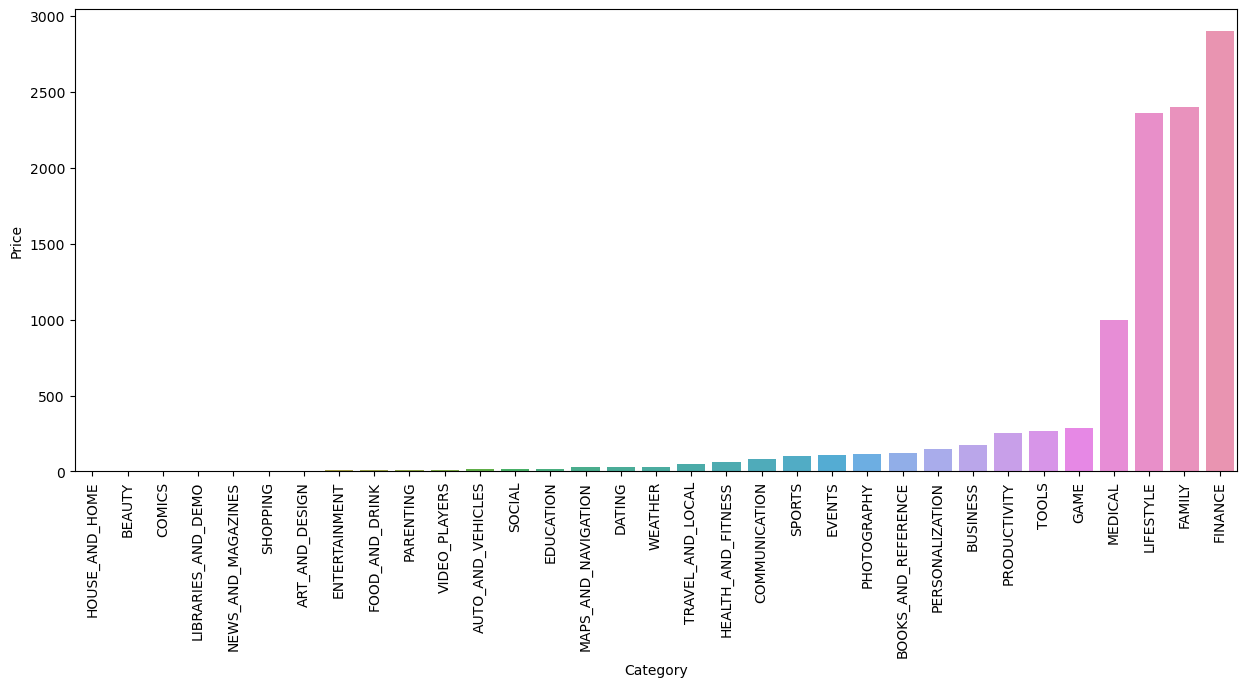

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(data=a,x=a.index,y=a["Price"])
plt.xticks(rotation=90)

In [49]:
df1['Category'].value_counts().sort_values(ascending=False)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [50]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = df1['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = df1['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## 4. Average rating of apps

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [51]:
df1["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [52]:
df1["Rating"].mean()

4.173243045387994

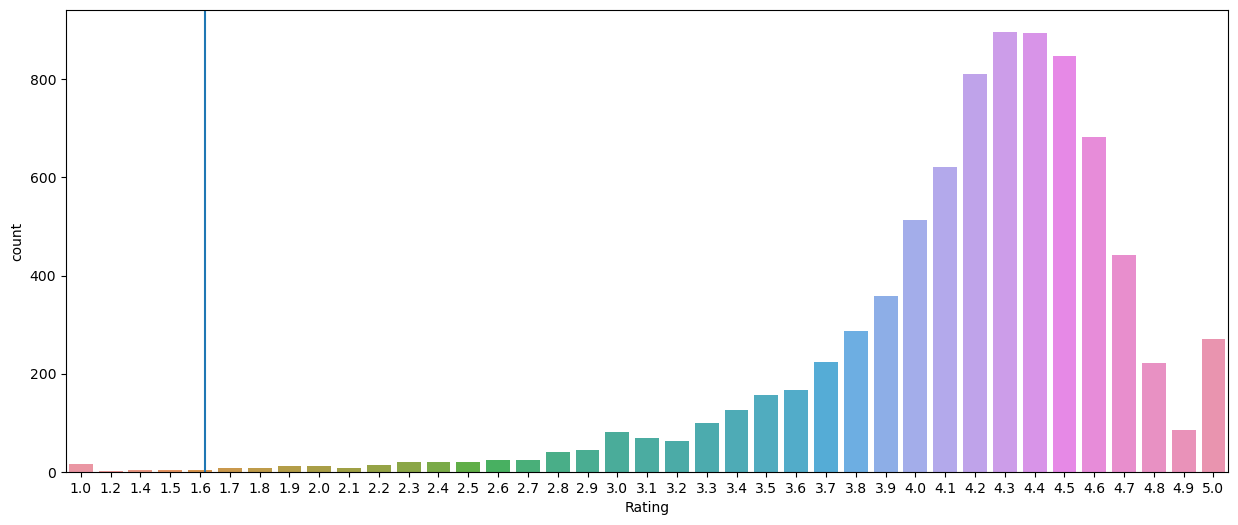

In [53]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df1,x="Rating")
plt.axvline(x=4.173243045387994)
# for bar in ax.containers:
#     ax.bar_label(bar)

In [54]:
# Average rating of apps
avg_app_rating = df1['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = df1['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})


Average app rating =  4.173243045387994


## 5. Sizing and pricing strategy

Let's now examine app sizes and app prices. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

* Does the size of an app affect its rating?

* Do users really care about system-heavy apps or do they prefer light-weighted apps?

* Does the price of an app affect its rating?

* Do users always prefer free apps over paid apps?

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

In [55]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [56]:
def func(x):
    if x<2:
        return "<2"
    elif x>=2 and x<=20:
        return "2-20"
    else:
        return "20+"

In [57]:
df1["Size_slab"]=df1.Size.apply(func)

In [58]:
df1[df1["Rating"]>4]

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews          Size    Installs  Type  Price Content Rating  \
0         4.1      159  1.900000e+01     10000.0  Free    0.0       Everyone   
2         4.7    87510  8.700000e+00   5000000.0  Free    0.0       Everyone   
3         4.5   215644  2.500000e+01  50000000.0  Free    0.0           Teen   
4         4.3      967  2.800000e+00    100000.0  Free    0.0       Everyone   
5         4.4      167  5.600000e+00     50000.0  Free    0.0       Everyone   
...       ...      ...           ...         ...   ...    ...            ...   
10833     4.8       44  6.044922e-01      1000.0  Free    0.0       Everyone   
10836     4.5       38  5.300000e+01      5000.0  Free    0.0       Everyone   
10837     5.0        4  3.600000e+00       100.0  Free    0.0       Everyone   
10839     4.5      114  2.039529e+07      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307  1.900000e+01  10000000.0  Free    0.0       Everyone   

                        Genres      Last Updated         Current Ver  \
0                 Art & Design   January 7, 2018               1.0.0   
2                 Art & Design    August 1, 2018               1.2.4   
3                 Art & Design      June 8, 2018  Varies with device   
4      Art & Design;Creativity     June 20, 2018                 1.1   
5                 Art & Design    March 26, 2017                 1.0   
...                        ...               ...                 ...   
10833        Books & Reference    March 23, 2014                 0.8   
10836                Education     July 25, 2017                1.48   
10837                Education      July 6, 2018                 1.0   
10839        Books & Reference  January 19, 2015  Varies with device   
10840                Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
5              2.3 and up      2-20  
...                   ...       ...  
10833          2.2 and up        <2  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[5773 rows x 14 columns]

<Axes: xlabel='Size_slab', ylabel='count'>

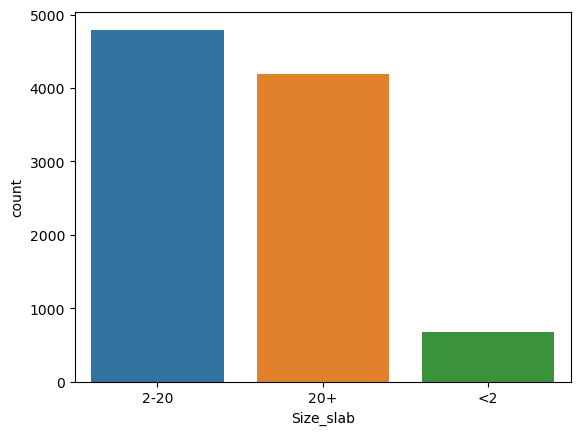

In [59]:
sns.countplot(data=df1,x="Size_slab")

<Axes: xlabel='Size_slab', ylabel='count'>

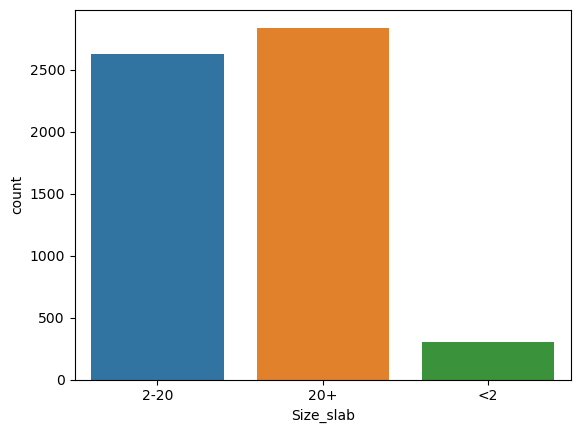

In [60]:
sns.countplot(data=df1[df1["Rating"]>4],x="Size_slab")

In [61]:
df1["Size"].describe()

count    9.659000e+03
mean     2.590868e+06
std      6.792151e+06
min      8.300781e-03
25%      5.300000e+00
50%      1.600000e+01
75%      4.300000e+01
max      2.039529e+07
Name: Size, dtype: float64

Does the size of an app affect its rating?

In [62]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
1            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
...                   ...       ...  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10838          2.2 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[9659 rows x 14 columns]

<Axes: xlabel='Size', ylabel='Rating'>

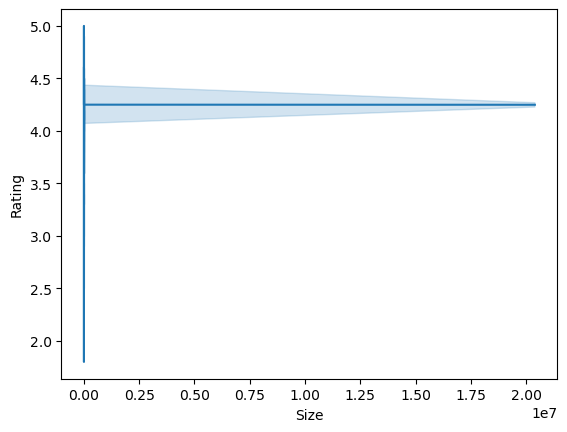

In [63]:
sns.lineplot(data=df1,y="Rating",x="Size")

In [64]:
a=pd.DataFrame()
for i,j in df1.groupby('Category'):
    if len(j)>=250:
        a=pd.concat([a,j],axis=0)
a

App  Category  Rating  \
187                        Visual Voicemail by MetroPCS  BUSINESS     4.1   
188                                   Indeed Job Search  BUSINESS     4.3   
189                                         Uber Driver  BUSINESS     4.4   
190                                ADP Mobile Solutions  BUSINESS     4.3   
191                              Snag - Jobs Hiring Now  BUSINESS     4.3   
...                                                 ...       ...     ...   
10795                          Reindeer VPN - Proxy VPN     TOOLS     4.2   
10796  Inf VPN - Global Proxy & Unlimited Free WIFI VPN     TOOLS     4.7   
10800                                         FR Roster     TOOLS     4.1   
10807                                         My FR App     TOOLS     NaN   
10817                              HTC Sense Input - FR     TOOLS     4.0   

       Reviews         Size    Installs  Type  Price Content Rating    Genres  \
187      16129  20395289.31  10000000.0  Free    0.0       Everyone  Business   
188     674730  20395289.31  50000000.0  Free    0.0       Everyone  Business   
189    1254730  20395289.31  10000000.0  Free    0.0       Everyone  Business   
190      85185        29.00   5000000.0  Free    0.0       Everyone  Business   
191      32584  20395289.31   1000000.0  Free    0.0       Everyone  Business   
...        ...          ...         ...   ...    ...            ...       ...   
10795     7339         4.00    100000.0  Free    0.0       Everyone     Tools   
10796    61445         7.80   1000000.0  Free    0.0       Everyone     Tools   
10800      174        12.00      5000.0  Free    0.0       Everyone     Tools   
10807        2         4.20       100.0  Free    0.0       Everyone     Tools   
10817      885         8.00    100000.0  Free    0.0       Everyone     Tools   

           Last Updated         Current Ver         Android Ver Size_slab  
187       July 30, 2018  Varies with device  Varies with device       20+  
188        May 21, 2018  Varies with device  Varies with device       20+  
189      August 3, 2018  Varies with device  Varies with device       20+  
190       July 17, 2018               3.4.2          5.0 and up       20+  
191         May 4, 2018  Varies with device  Varies with device       20+  
...                 ...                 ...                 ...       ...  
10795      May 10, 2018                1.74          4.1 and up      2-20  
10796     July 26, 2018             1.9.734          4.1 and up      2-20  
10800     July 30, 2018                6.04          4.4 and up      2-20  
10807     April 9, 2018          1.283.0037        2.3.3 and up      2-20  
10817  October 30, 2015          1.0.612928          5.0 and up      2-20  

[7360 rows x 14 columns]

In [65]:
df1.groupby('Category').filter(lambda x: len(x) >= 250)

App   Category  Rating  \
187                     Visual Voicemail by MetroPCS   BUSINESS     4.1   
188                                Indeed Job Search   BUSINESS     4.3   
189                                      Uber Driver   BUSINESS     4.4   
190                             ADP Mobile Solutions   BUSINESS     4.3   
191                           Snag - Jobs Hiring Now   BUSINESS     4.3   
...                                              ...        ...     ...   
10835                                       FR Forms   BUSINESS     NaN   
10836                               Sya9a Maroc - FR     FAMILY     4.5   
10837               Fr. Mike Schmitz Audio Teachings     FAMILY     5.0   
10838                         Parkinson Exercices FR    MEDICAL     NaN   
10840  iHoroscope - 2018 Daily Horoscope & Astrology  LIFESTYLE     4.5   

       Reviews         Size    Installs  Type  Price Content Rating  \
187      16129  20395289.31  10000000.0  Free    0.0       Everyone   
188     674730  20395289.31  50000000.0  Free    0.0       Everyone   
189    1254730  20395289.31  10000000.0  Free    0.0       Everyone   
190      85185        29.00   5000000.0  Free    0.0       Everyone   
191      32584  20395289.31   1000000.0  Free    0.0       Everyone   
...        ...          ...         ...   ...    ...            ...   
10835        0         9.60        10.0  Free    0.0       Everyone   
10836       38        53.00      5000.0  Free    0.0       Everyone   
10837        4         3.60       100.0  Free    0.0       Everyone   
10838        3         9.50      1000.0  Free    0.0       Everyone   
10840   398307        19.00  10000000.0  Free    0.0       Everyone   

          Genres        Last Updated         Current Ver         Android Ver  \
187     Business       July 30, 2018  Varies with device  Varies with device   
188     Business        May 21, 2018  Varies with device  Varies with device   
189     Business      August 3, 2018  Varies with device  Varies with device   
190     Business       July 17, 2018               3.4.2          5.0 and up   
191     Business         May 4, 2018  Varies with device  Varies with device   
...          ...                 ...                 ...                 ...   
10835   Business  September 29, 2016               1.1.5          4.0 and up   
10836  Education       July 25, 2017                1.48          4.1 and up   
10837  Education        July 6, 2018                 1.0          4.1 and up   
10838    Medical    January 20, 2017                 1.0          2.2 and up   
10840  Lifestyle       July 25, 2018  Varies with device  Varies with device   

      Size_slab  
187         20+  
188         20+  
189         20+  
190         20+  
191         20+  
...         ...  
10835      2-20  
10836       20+  
10837      2-20  
10838      2-20  
10840      2-20  

[7360 rows x 14 columns]

In [67]:
sns.jointplot(data=a,x="Size",y="Rating")

In [ ]:
sns.jointplot(data=a,x=a["Size"],y=a["Rating"])

## 6. How should you price your app?

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Needless to say, different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free whereas it would make sense to charge a price from the customers for a specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

In [68]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
1            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
...                   ...       ...  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10838          2.2 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[9659 rows x 14 columns]

In [70]:
df1[(df1["Category"]=="FINANCE") & (df1["Price"]!=0)]

App Category  Rating  Reviews       Size  \
5356                I Am Rich Premium  FINANCE     4.1     1867   4.700000   
5358                       I am Rich!  FINANCE     3.8       93  22.000000   
5359               I am rich(premium)  FINANCE     3.5      472   0.942383   
5361           I am Rich Premium Plus  FINANCE     4.6      459   2.000000   
5364   I am rich (Most expensive app)  FINANCE     4.1      129   2.700000   
5369                        I am Rich  FINANCE     4.3      180   3.800000   
5373               I AM RICH PRO PLUS  FINANCE     4.0       36  41.000000   
5911     Ba Financial Calculator plus  FINANCE     4.4       31   0.201172   
5912   Financial Calculator BA Chien.  FINANCE     4.2       23   0.931641   
5914      BA Pro Financial Calculator  FINANCE     2.4       36   9.400000   
6886                   My Budget Book  FINANCE     4.7    19784   7.300000   
6948          Bitcoin BX Thailand PRO  FINANCE     1.7       21  21.000000   
9101                           amm dz  FINANCE     NaN        0  14.000000   
9104                         Dz kayas  FINANCE     NaN        0  14.000000   
9905                      Eu sou Rico  FINANCE     NaN        0   2.600000   
9917                      Eu Sou Rico  FINANCE     NaN        0   1.400000   
10540    Ray Financial Calculator Pro  FINANCE     4.0       67   2.400000   

       Installs  Type   Price Content Rating   Genres       Last Updated  \
5356    50000.0  Paid  399.99       Everyone  Finance  November 12, 2017   
5358     1000.0  Paid  399.99       Everyone  Finance  December 11, 2017   
5359     5000.0  Paid  399.99       Everyone  Finance        May 1, 2017   
5361    10000.0  Paid   18.99       Everyone  Finance  February 17, 2018   
5364     1000.0  Paid  399.99           Teen  Finance   December 6, 2017   
5369     5000.0  Paid  399.99       Everyone  Finance     March 22, 2018   
5373     1000.0  Paid  399.99       Everyone  Finance      June 25, 2018   
5911     1000.0  Paid    3.99       Everyone  Finance      July 15, 2018   
5912      500.0  Paid    3.99       Everyone  Finance  December 14, 2016   
5914     1000.0  Paid    1.99       Everyone  Finance  November 16, 2015   
6886   100000.0  Paid    2.99       Everyone  Finance      June 13, 2018   
6948      100.0  Paid    4.99       Everyone  Finance   October 22, 2017   
9101        1.0  Paid    5.99       Everyone  Finance       July 8, 2018   
9104        1.0  Paid   28.99       Everyone  Finance      July 12, 2018   
9905        0.0  Paid   30.99       Everyone  Finance    January 9, 2018   
9917        0.0  Paid  394.99       Everyone  Finance      July 11, 2018   
10540   10000.0  Paid    2.99       Everyone  Finance       July 3, 2017   

      Current Ver   Android Ver Size_slab  
5356          1.6    4.0 and up      2-20  
5358          1.0    4.1 and up       20+  
5359          3.4    4.4 and up        <2  
5361          1.1  4.0.3 and up      2-20  
5364            2  4.0.3 and up      2-20  
5369          1.0    4.2 and up      2-20  
5373        1.0.2    4.1 and up       20+  
5911        2.9.1    2.1 and up        <2  
5912       1.9.10    3.0 and up        <2  
5914        1.3.3    2.3 and up      2-20  
6886          7.6    4.0 and up      2-20  
6948          5.0  4.0.3 and up       20+  
9101          1.0    4.2 and up      2-20  
9104          1.0    4.2 and up      2-20  
9905          1.0    4.0 and up      2-20  
9917          1.0  4.0.3 and up        <2  
10540           4    3.2 and up      2-20

In [73]:
df1["Price"].describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

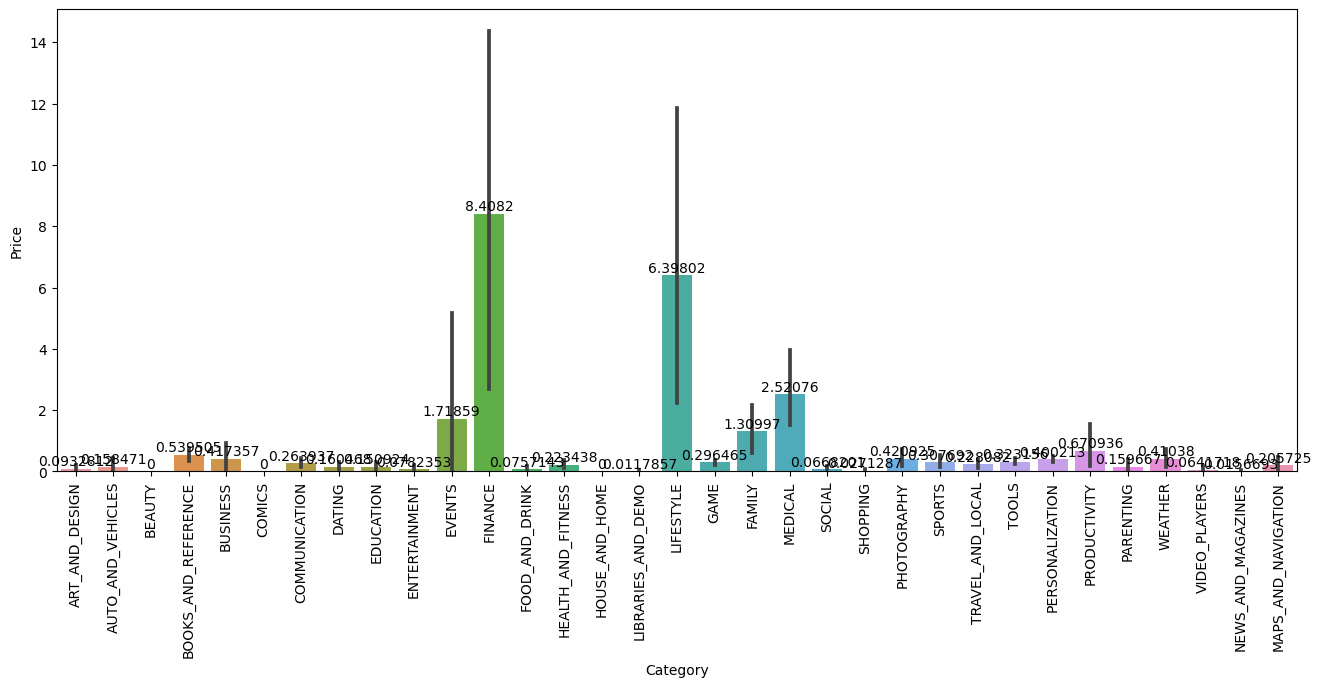

In [79]:
plt.figure(figsize=(16,6))
ax=sns.barplot(data=df1,x="Category",y="Price")
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

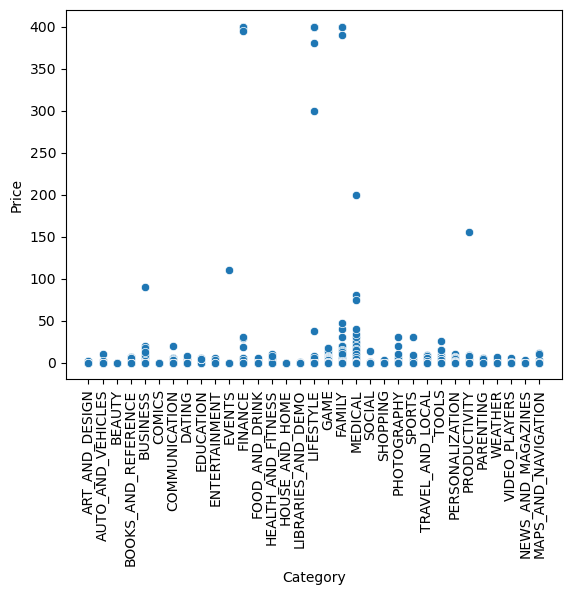

In [81]:
sns.scatterplot(data=df1,x="Category",y="Price")
plt.xticks(rotation=90)

In [72]:
df1["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'BUSINESS'),
  Text(1, 0, 'FINANCE'),
  Text(2, 0, 'LIFESTYLE'),
  Text(3, 0, 'GAME'),
  Text(4, 0, 'FAMILY'),
  Text(5, 0, 'MEDICAL'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'TOOLS')])

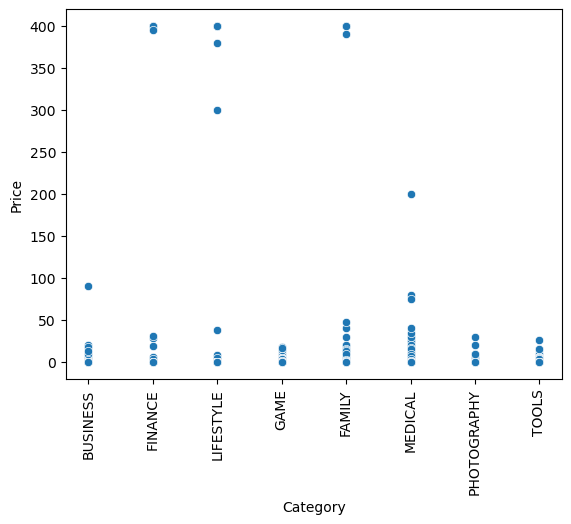

In [82]:
popular_app_cats = df1[df1.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
sns.scatterplot(data=popular_app_cats,x="Category",y="Price")
plt.xticks(rotation=90)

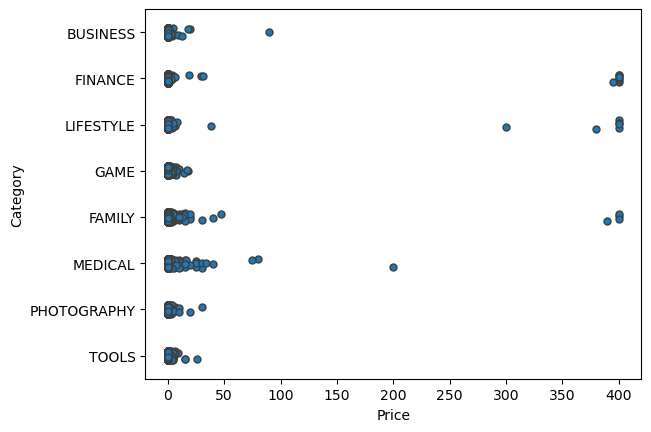

In [84]:
# Select a few popular app categories
popular_app_cats = df1[df1.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)

## 7. Filter out "junk" apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

In [90]:
a=df1[df1["Price"]<100]

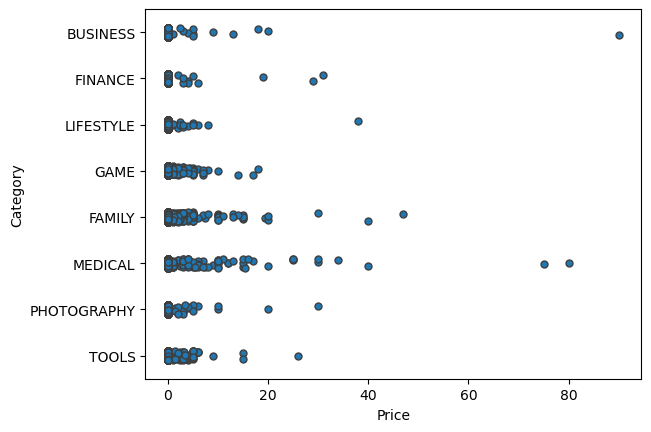

In [89]:
# Select a few popular app categories
popular_app_cats = a[a.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)

In [91]:
a=df1[df1["Price"]<50]

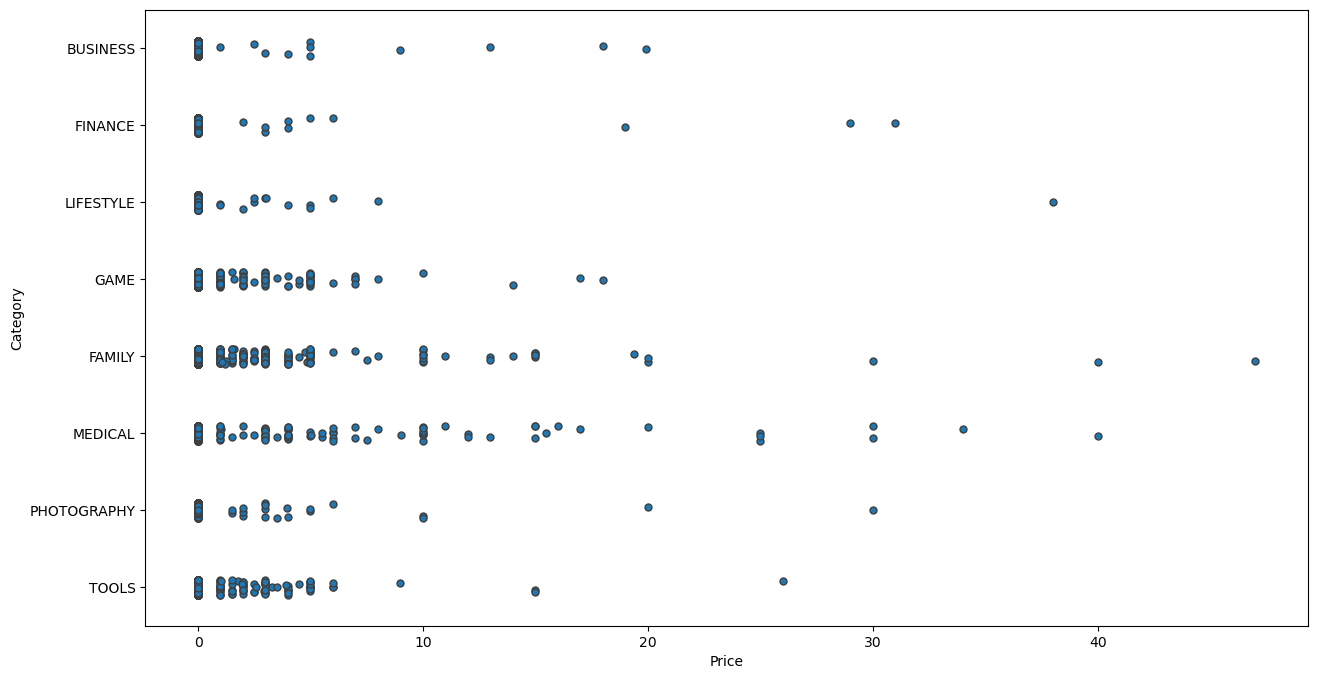

In [93]:
# Select a few popular app categories
popular_app_cats = a[a.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)

## 8. Number of installs for paid apps vs. free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

* Free to download.

* Main source of income often comes from advertisements.

* Often created by companies that have other products and the app serves as an extension of those products.

* Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.
Are paid apps are installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [94]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
1            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
...                   ...       ...  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10838          2.2 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[9659 rows x 14 columns]

In [95]:
df1["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [100]:
df1[df1["Type"]=="Paid"]["Installs"].mean()

75879.47222222222

In [104]:
df1["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

<Axes: xlabel='Type', ylabel='Installs'>

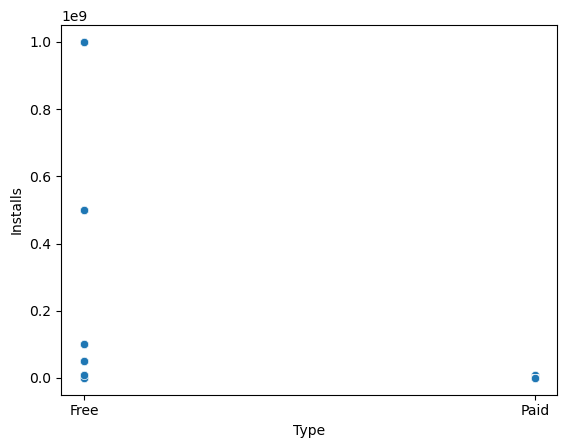

In [105]:
sns.scatterplot(data=df1,x="Type",y="Installs")

In [106]:
0.4*10**9

400000000.0

In [111]:
#lets remove some outliers
a=df1[df1["Installs"]<400000000]
a

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
1            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
...                   ...       ...  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10838          2.2 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[9615 rows x 14 columns]

(0.0, 20000000.0)

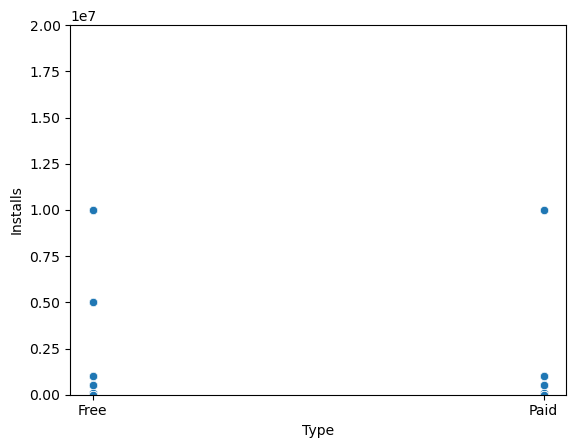

In [113]:
sns.scatterplot(data=a,x="Type",y="Installs")
plt.ylim(0,0.2*10**8)

In [116]:
a=df1.dropna()

<Axes: xlabel='Installs', ylabel='Type'>

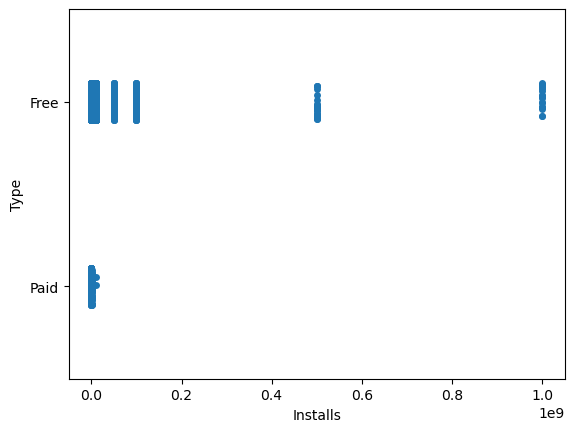

In [117]:
sns.stripplot(data=a,y="Type",x="Installs")

In [119]:
trace0 = go.Box(
    # Data for paid apps
    y=df1[df1['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=df1[df1['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [123]:
df1[df1["Type"]=="Free"]["Installs"].describe()

count    8.902000e+03
mean     8.432439e+06
std      5.594850e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
100000

In [ ]:
1000000

(0.0, 1500000.0)

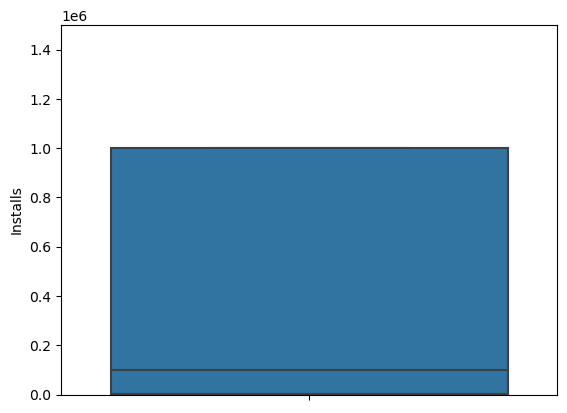

In [133]:
sns.boxplot(y=df1[df1["Type"]=="Free"]["Installs"])
plt.ylim(0,1500000)

<Axes: xlabel='Type', ylabel='Installs'>

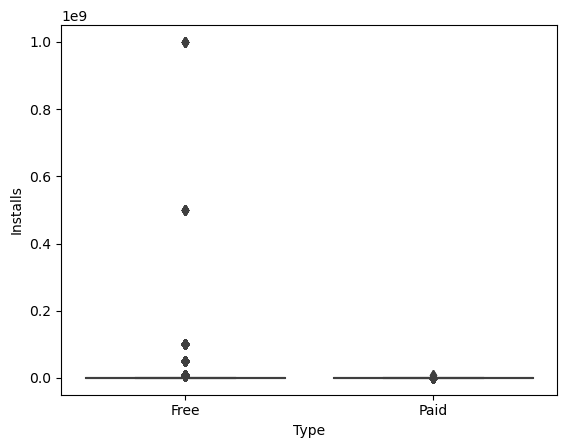

In [120]:
sns.boxplot(data=df1,x="Type",y="Installs")

## 9. Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

In [134]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
1            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
...                   ...       ...  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10838          2.2 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[9659 rows x 14 columns]

In [135]:
df2=pd.read_csv("user_reviews.csv")

In [144]:
len(df2)

64295

In [139]:
df2.sample(20)

App  \
16984                                         Bowmasters   
45040                       FastMeet: Chat, Dating, Love   
32680  DU Recorder – Screen Recorder, Video Editor, Live   
50252                                   Fruit Cube Blast   
38109                      ES File Explorer File Manager   
51797                                          GRE Tutor   
20374                       CNN Breaking US & World News   
51011                                     G Cloud Backup   
15143                     Black People Meet Singles Date   
62502                           Hiya - Caller ID & Block   
19725  CBS Sports App - Scores, News, Stats & Watch Live   
14439  BestCam Selfie-selfie, beauty camera, photo ed...   
52420                               Garden Coloring Book   
47491                                          Flow Free   
6346   Amazon FreeTime – Kids’ Videos, Books, & TV shows   
47676                             Flowers Live Wallpaper   
53293                                        Geocaching®   
19316                      CATS: Crash Arena Turbo Stars   
43613  Family GPS Tracker and Chat + Baby Monitor Online   
43527  Family Album Mitene: Private Photo & Video Sha...   

                                       Translated_Review Sentiment  \
16984  The game nice, good gameplay, easy learn fun. ...  Positive   
45040                                               Love  Positive   
32680  I think great. Especially people camera want Y...  Positive   
50252                                                NaN       NaN   
38109                                                NaN       NaN   
51797  Too many errors! I would love rate 5 stars, ed...  Positive   
20374  I love CNN product, I love reporting programmi...  Positive   
51011  There problem Auto Backup. Sometimes go weeks ...  Positive   
15143                                                NaN       NaN   
62502                                                NaN       NaN   
19725  There many times play play info inaccurate rea...  Positive   
14439                                          It's nice  Positive   
52420                                          It's nice  Positive   
47491  The game like 4 5 star worth game every time c...  Negative   
6346                                                  Hi   Neutral   
47676                                          Very nice  Positive   
53293                                                NaN       NaN   
19316                                                NaN       NaN   
43613                                           Not good  Negative   
43527     Having family lives amazing sharing milestones  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  
16984            0.191667                0.579167  
45040            0.500000                0.600000  
32680            0.484091                0.812500  
50252                 NaN                     NaN  
38109                 NaN                     NaN  
51797            0.184028                0.429861  
20374            0.375000                0.575000  
51011            0.250000                0.482906  
15143                 NaN                     NaN  
62502                 NaN                     NaN  
19725            0.350000                0.400000  
14439            0.600000                1.000000  
52420            0.600000                1.000000  
47491           -0.041667                0.191667  
6346             0.000000                0.000000  
47676            0.780000                1.000000  
53293                 NaN                     NaN  
19316                 NaN                     NaN  
43613           -0.350000                0.600000  
43527            0.600000                0.900000

In [137]:
df2.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [141]:
df2.duplicated().sum()

33616

In [143]:
df2["App"].duplicated().sum()

63221

In [146]:
a=df2.groupby("App")["Sentiment_Polarity"].mean()
a

App
10 Best Foods for You                             0.470733
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                  0.392405
11st                                              0.181294
1800 Contacts - Lens Store                        0.318145
1LINE – One Line with One Touch                   0.196290
                                                    ...   
Hotspot Shield Free VPN Proxy & Wi-Fi Security    0.251765
Hotstar                                           0.038178
Hotwire Hotel & Car Rental App                    0.187029
Housing-Real Estate & Property                   -0.021427
Houzz Interior Design Ideas                            NaN
Name: Sentiment_Polarity, Length: 1074, dtype: float64

In [153]:
a.isna().sum()

209

In [152]:
dict(a)

{'10 Best Foods for You': 0.4707328206587227,
 '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室': 0.3924045634920635,
 '11st': 0.18129421446608945,
 '1800 Contacts - Lens Store': 0.3181447736291486,
 '1LINE – One Line with One Touch': 0.19629029961266803,
 '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif': 0.4495659722222222,
 '21-Day Meditation Experience': 0.25801367845117845,
 '2Date Dating App, Love and matching': 0.2802671702652353,
 '2GIS: directory & navigator': 0.22312904265873015,
 '2RedBeans': 0.4121991790261021,
 '2ndLine - Second Phone Number': 0.16896820887445888,
 '30 Day Fitness Challenge - Workout at Home': 0.33353687339286414,
 '365Scores - Live Scores': 0.4383116883116883,
 '3D Blue Glass Water Keyboard Theme': nan,
 '3D Color Pixel by Number - Sandbox Art Coloring': nan,
 '3D Live Neon Weed Launcher': 0.5681818181818181,
 '4 in a Row': 0.28114351851851854,
 '4K Wallpapers and Ultra HD Backgrounds': 0.17932800224466894,
 '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢': 0.08079

In [154]:
df1["App"].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

In [150]:
df1

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews         Size    Installs  Type  Price Content Rating  \
0         4.1      159        19.00     10000.0  Free    0.0       Everyone   
1         3.9      967        14.00    500000.0  Free    0.0       Everyone   
2         4.7    87510         8.70   5000000.0  Free    0.0       Everyone   
3         4.5   215644        25.00  50000000.0  Free    0.0           Teen   
4         4.3      967         2.80    100000.0  Free    0.0       Everyone   
...       ...      ...          ...         ...   ...    ...            ...   
10836     4.5       38        53.00      5000.0  Free    0.0       Everyone   
10837     5.0        4         3.60       100.0  Free    0.0       Everyone   
10838     NaN        3         9.50      1000.0  Free    0.0       Everyone   
10839     4.5      114  20395289.31      1000.0  Free    0.0     Mature 17+   
10840     4.5   398307        19.00  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839          Books & Reference  January 19, 2015  Varies with device   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver Size_slab  
0            4.0.3 and up      2-20  
1            4.0.3 and up      2-20  
2            4.0.3 and up      2-20  
3              4.2 and up       20+  
4              4.4 and up      2-20  
...                   ...       ...  
10836          4.1 and up       20+  
10837          4.1 and up      2-20  
10838          2.2 and up      2-20  
10839  Varies with device       20+  
10840  Varies with device      2-20  

[9659 rows x 14 columns]

In [156]:
df3=df1[["App","Type"]]

In [157]:
df3["Sentiment_Polarity"]=df1["App"].map(a)

C:\Users\prash\AppData\Local\Temp\ipykernel_5708\353393151.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
df3

App  Type  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  Free   
1                                    Coloring book moana  Free   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  Free   
3                                  Sketch - Draw & Paint  Free   
4                  Pixel Draw - Number Art Coloring Book  Free   
...                                                  ...   ...   
10836                                   Sya9a Maroc - FR  Free   
10837                   Fr. Mike Schmitz Audio Teachings  Free   
10838                             Parkinson Exercices FR  Free   
10839                      The SCP Foundation DB fr nn5n  Free   
10840      iHoroscope - 2018 Daily Horoscope & Astrology  Free   

       Sentiment_Polarity  
0                     NaN  
1                0.152652  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
10836                 NaN  
10837                 NaN  
10838                 NaN  
10839                 NaN  
10840                 NaN  

[9659 rows x 3 columns]

In [165]:
merged_df = pd.merge(df1, df2, on = 'App', how = "inner")
merged_df

App        Category  Rating  Reviews  \
0               Coloring book moana  ART_AND_DESIGN     3.9      967   
1               Coloring book moana  ART_AND_DESIGN     3.9      967   
2               Coloring book moana  ART_AND_DESIGN     3.9      967   
3               Coloring book moana  ART_AND_DESIGN     3.9      967   
4               Coloring book moana  ART_AND_DESIGN     3.9      967   
...                             ...             ...     ...      ...   
61551  A+ Gallery - Photos & Videos     PHOTOGRAPHY     4.5   223941   
61552  A+ Gallery - Photos & Videos     PHOTOGRAPHY     4.5   223941   
61553  A+ Gallery - Photos & Videos     PHOTOGRAPHY     4.5   223941   
61554  A+ Gallery - Photos & Videos     PHOTOGRAPHY     4.5   223941   
61555  A+ Gallery - Photos & Videos     PHOTOGRAPHY     4.5   223941   

              Size    Installs  Type  Price Content Rating  \
0            14.00    500000.0  Free    0.0       Everyone   
1            14.00    500000.0  Free    0.0       Everyone   
2            14.00    500000.0  Free    0.0       Everyone   
3            14.00    500000.0  Free    0.0       Everyone   
4            14.00    500000.0  Free    0.0       Everyone   
...            ...         ...   ...    ...            ...   
61551  20395289.31  10000000.0  Free    0.0       Everyone   
61552  20395289.31  10000000.0  Free    0.0       Everyone   
61553  20395289.31  10000000.0  Free    0.0       Everyone   
61554  20395289.31  10000000.0  Free    0.0       Everyone   
61555  20395289.31  10000000.0  Free    0.0       Everyone   

                          Genres      Last Updated         Current Ver  \
0      Art & Design;Pretend Play  January 15, 2018               2.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2      Art & Design;Pretend Play  January 15, 2018               2.0.0   
3      Art & Design;Pretend Play  January 15, 2018               2.0.0   
4      Art & Design;Pretend Play  January 15, 2018               2.0.0   
...                          ...               ...                 ...   
61551                Photography    August 6, 2018  Varies with device   
61552                Photography    August 6, 2018  Varies with device   
61553                Photography    August 6, 2018  Varies with device   
61554                Photography    August 6, 2018  Varies with device   
61555                Photography    August 6, 2018  Varies with device   

              Android Ver Size_slab  \
0            4.0.3 and up      2-20   
1            4.0.3 and up      2-20   
2            4.0.3 and up      2-20   
3            4.0.3 and up      2-20   
4            4.0.3 and up      2-20   
...                   ...       ...   
61551  Varies with device       20+   
61552  Varies with device       20+   
61553  Varies with device       20+   
61554  Varies with device       20+   
61555  Varies with device       20+   

                                       Translated_Review Sentiment  \
0      A kid's excessive ads. The types ads allowed a...  Negative   
1                                             It bad >:(  Negative   
2                                                   like   Neutral   
3                                                    NaN       NaN   
4                               I love colors inspyering  Positive   
...                                                  ...       ...   
61551                                                NaN       NaN   
61552                                                NaN       NaN   
61553                                       Too much ads  Positive   
61554                                Just allow time ...   Neutral   
61555                       It's good best gallery phone  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                  -0.250                1.000000  
1                  -0.725                0.833333  
2                   0.000                0.000000  
3              

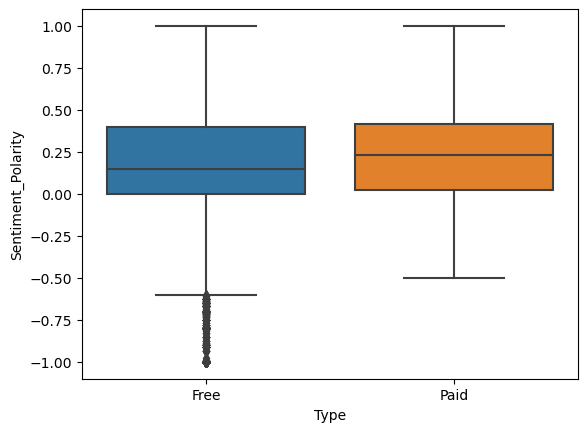

In [167]:
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)


In [166]:
trace0 = go.Box(
    # Data for paid apps
    y=merged_df[merged_df['Type'] == 'Paid']['Sentiment_Polarity'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=merged_df[merged_df['Type'] == 'Free']['Sentiment_Polarity'],
    name = 'Free'
)

layout = go.Layout(
    title = "Sentiment polarity of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [161]:
df4=df3.dropna()
df4

App  Type  Sentiment_Polarity
1                           Coloring book moana  Free            0.152652
8                          Garden Coloring Book  Free            0.268483
18                FlipaClip - Cartoon animation  Free            0.412649
21    Boys Photo Editor - Six Pack & Men's Suit  Free            0.283509
26                Colorfit - Drawing & Coloring  Free            0.171836
...                                         ...   ...                 ...
4945  AD - Nieuws, Sport, Regio & Entertainment  Free            0.161824
5077                                    AppLock  Free            0.016233
5393                   Diary with lock password  Free            0.292267
5702             Avakin Life - 3D virtual world  Free            0.080859
9862               A+ Gallery - Photos & Videos  Free            0.208815

[816 rows x 3 columns]

<Axes: xlabel='Type', ylabel='Sentiment_Polarity'>

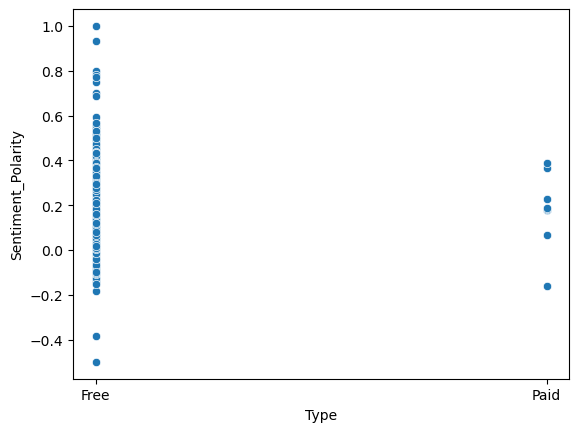

In [162]:
sns.scatterplot(data=df4,x="Type",y="Sentiment_Polarity")

In [163]:
trace0 = go.Box(
    # Data for paid apps
    y=df4[df4['Type'] == 'Paid']['Sentiment_Polarity'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=df4[df4['Type'] == 'Free']['Sentiment_Polarity'],
    name = 'Free'
)

layout = go.Layout(
    title = "Sentiment polarity of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})